In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from moexalgo import Ticker
import matplotlib.pyplot as plt
from moexalgo import Ticker
import pandas as pd

# Initialize an empty DataFrame
result = pd.DataFrame()

# Loop through the date range
for i in range(0, 100000, 10000):
    # Calculate the current date
    current_date = pd.to_datetime('2020-01-01') + pd.to_timedelta(i, unit='T')
    
    # Check if the current date is after the end date
    if current_date > pd.to_datetime('2023-10-18'):
        break
    
    # Create a Ticker object for SBER
    sber = Ticker('SBER')
    
    # Fetch candles data for the current date
    df = sber.candles(date=current_date, till_date='2023-10-18', period='1m')
    
    # Concatenate the current DataFrame with the result DataFrame
    result = pd.concat([result, df], ignore_index=True)

# Print the resulting DataFrame
print(result)


         open   close    high     low        value    volume  \
0      255.99  255.99  255.99  255.99    7085803.2   27680.0   
1      255.97  256.25  256.48  255.85  125850445.1  491340.0   
2      256.28  256.68  256.73  256.17   51760336.6  201870.0   
3      256.68  256.77  256.97  256.61   56437567.9  219760.0   
4      256.80  256.79  256.80  256.60   29724410.4  115800.0   
...       ...     ...     ...     ...          ...       ...   
99995  187.56  187.59  187.66  187.55   17003542.5   90650.0   
99996  187.59  187.65  187.66  187.57   13904007.1   74110.0   
99997  187.63  187.55  187.70  187.55   39326218.2  209600.0   
99998  187.59  187.52  187.59  187.33   57533095.5  306890.0   
99999  187.52  187.34  187.52  187.21   47503774.0  253580.0   

                    begin                 end  
0     2020-01-03 09:59:00 2020-01-03 09:59:59  
1     2020-01-03 10:00:00 2020-01-03 10:00:59  
2     2020-01-03 10:01:00 2020-01-03 10:01:59  
3     2020-01-03 10:02:00 2020-01-03 10

624/624 [==============================] - 9s 14ms/step


<Figure size 864x576 with 0 Axes>

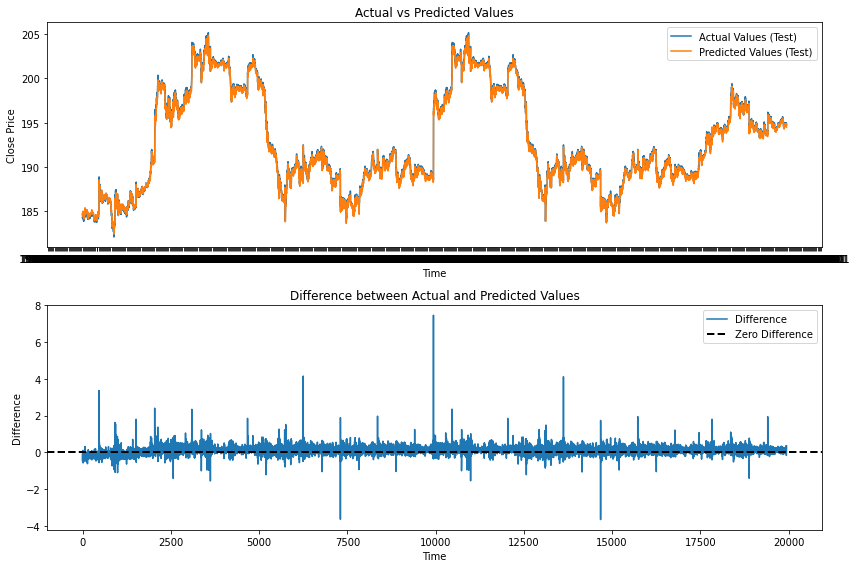

In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from moexalgo import Ticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
data2 = result2

# Преобразование времени в числовой формат
data2['begin'] = pd.to_numeric(data['begin'])
data2['end'] = pd.to_numeric(data['end'])

# Масштабирование данных
#scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data2 = scaler.fit_transform(data2[['open', 'close', 'high', 'low', 'value', 'volume', 'begin', 'end']].values)

X_new, _ = create_sequences(scaled_data2, sequence_length)
predicted_prices_new = model.predict(X_new)

predicted_prices_new_expanded = np.zeros((predicted_prices_new.shape[0], 8))
predicted_prices_new_expanded[:, 3] = predicted_prices_new[:, 0]
inverse_scaled_predictions_new = scaler.inverse_transform(predicted_prices_new_expanded)
final_predictions_new = inverse_scaled_predictions_new[:, 3]

# Преобразование числового времени обратно в даты
data2['begin'] = pd.to_datetime(data2['begin'], unit='ns')
data2['end'] = pd.to_datetime(data2['end'], unit='ns')

actual_prices_new = result2['close'].values[-len(final_predictions_new):]

# График фактических и предсказанных значений
plt.figure(figsize=(12, 8))

# График фактических и предсказанных значений
plt.figure(figsize=(12, 8))


plt.subplot(2, 1, 1)
plt.plot(actual_prices_new, label='Actual Values (Test)')
plt.plot(final_predictions_new, label='Predicted Values (Test)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Values')
plt.legend()

# Форматирование оси X для уменьшения количества отображаемых точек
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.tight_layout()

# График различий между фактическими и предсказанными значениями
plt.subplot(2, 1, 2)
difference = actual_prices_new - final_predictions_new
plt.plot(difference, label='Difference')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Difference between Actual and Predicted Values')
plt.axhline(0, color='black', linestyle='--', linewidth=2, label='Zero Difference')
plt.legend()
plt.tight_layout()
plt.show()

